In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
df = pd.read_excel('TOC_Prediction_DataSet.xlsx')

In [3]:
df.describe()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,150.448933,2.423001,3.892432,0.061492,0.271257,0.435876,0.052630
std,52.452284,0.019059,1.342193,0.014805,0.045289,0.080023,0.005062
min,50.218753,2.386117,1.680451,0.017432,0.153118,0.230041,0.030830
25%,123.462354,2.409469,3.120852,0.051250,0.238607,0.372234,0.051026
50%,141.662622,2.422639,3.650354,0.061158,0.264785,0.442414,0.053662
75%,166.707110,2.433418,4.319585,0.072289,0.303776,0.490972,0.056100
max,475.992627,2.540608,15.970625,0.096054,0.413083,0.683304,0.060907


In [4]:
df.columns

Index(['Thickness_ft', 'Bulk Density_gg per cc', 'Resistivity_ohmsm',
       'Effective Porosity_Fraction', 'Clay Volume_ Fraction',
       'Water Saturation_Fraction', 'TOC_Fraction'],
      dtype='object')

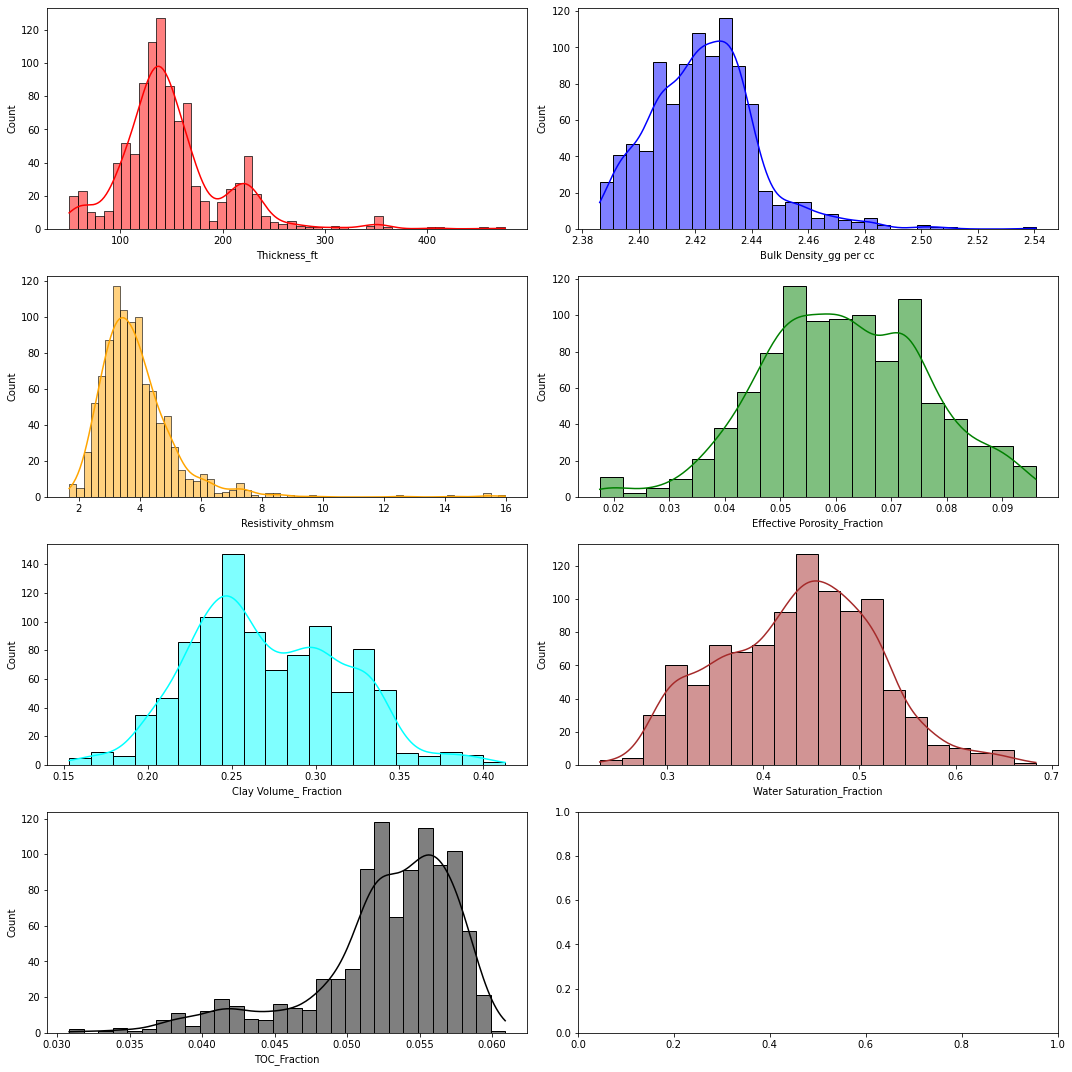

In [5]:
data = df
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
sns.histplot(x=data['Thickness_ft'] , color="red",kde=True, ax=axes[0, 0])
sns.histplot(x=data['Bulk Density_gg per cc'] , color="blue",kde=True, ax=axes[0, 1])
sns.histplot(x=data['Resistivity_ohmsm'] , color="orange",kde=True, ax=axes[1, 0])
sns.histplot(x=data['Effective Porosity_Fraction'] , color="green",kde=True, ax=axes[1, 1])
sns.histplot(x=data['Clay Volume_ Fraction'] , color="cyan",kde=True, ax=axes[2, 0])
sns.histplot(x=data['Water Saturation_Fraction'] , color="brown",kde=True, ax=axes[2, 1])
sns.histplot(x=data['TOC_Fraction'] , color="black",kde=True, ax=axes[3, 0])


plt.tight_layout()

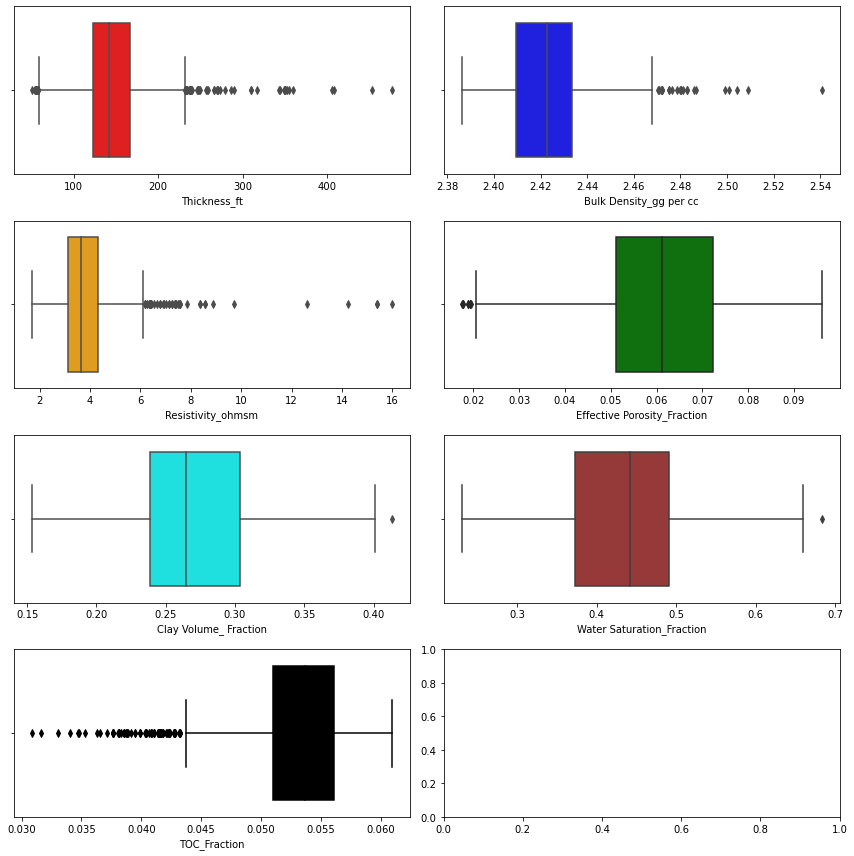

In [6]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(x=data['Thickness_ft'] , color="red", ax=axes[0, 0])
sns.boxplot(x=data['Bulk Density_gg per cc'] , color="blue", ax=axes[0, 1])
sns.boxplot(x=data['Resistivity_ohmsm'] , color="orange", ax=axes[1, 0])
sns.boxplot(x=data['Effective Porosity_Fraction'] , color="green", ax=axes[1, 1])
sns.boxplot(x=data['Clay Volume_ Fraction'] , color="cyan", ax=axes[2, 0])
sns.boxplot(x=data['Water Saturation_Fraction'] , color="brown", ax=axes[2, 1])
sns.boxplot(x=data['TOC_Fraction'] , color="black", ax=axes[3, 0])


plt.tight_layout()

<AxesSubplot:>

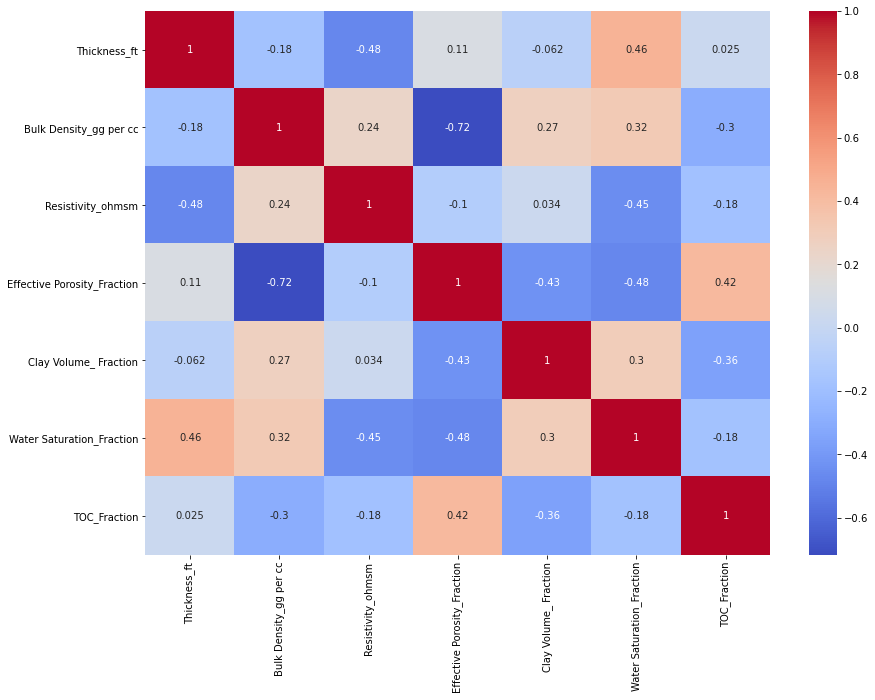

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

In [8]:
y=df['TOC_Fraction']
x=df.drop(['TOC_Fraction'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
test_sizes = [0.2, 0.4]



Training Data R^2= 0.9722 R= 0.986 for test size 0.2
Testing Data R^2= 0.7244 R= 0.8511 for test size 0.2
Training Data R^2= 0.9602 R= 0.9799 for test size 0.4
Testing Data R^2= 0.4217 R= 0.6494 for test size 0.4


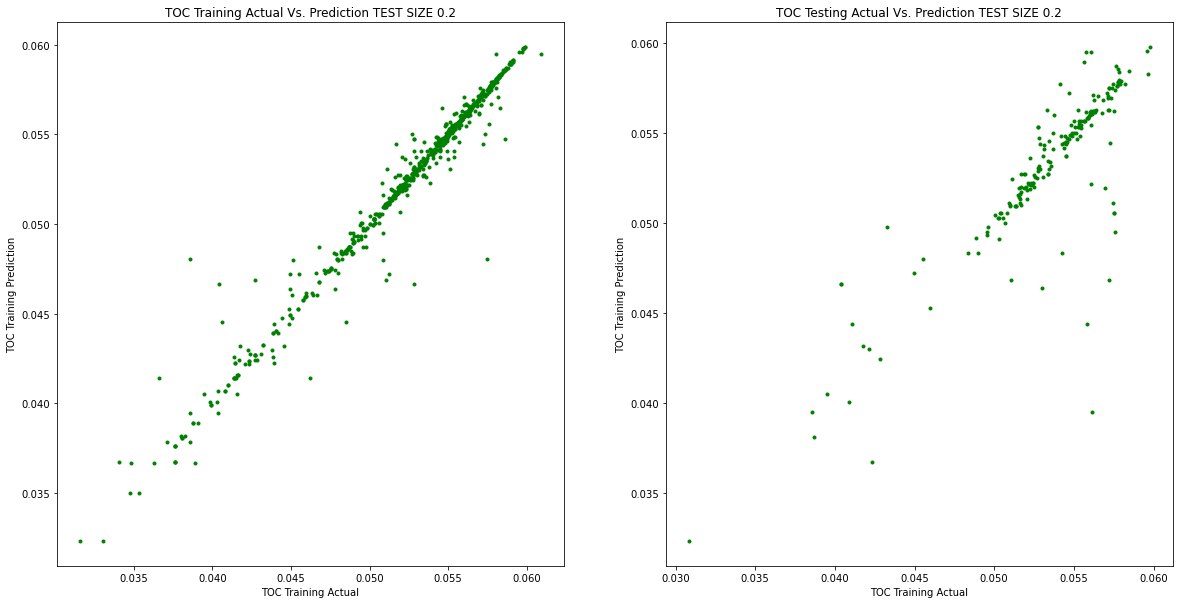

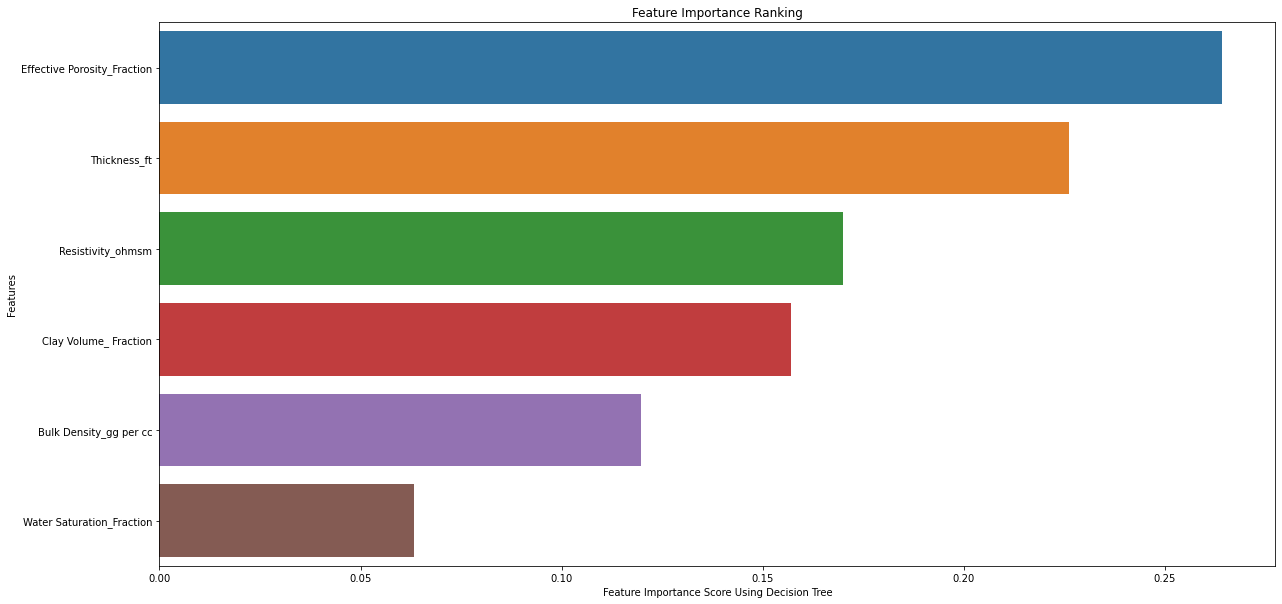

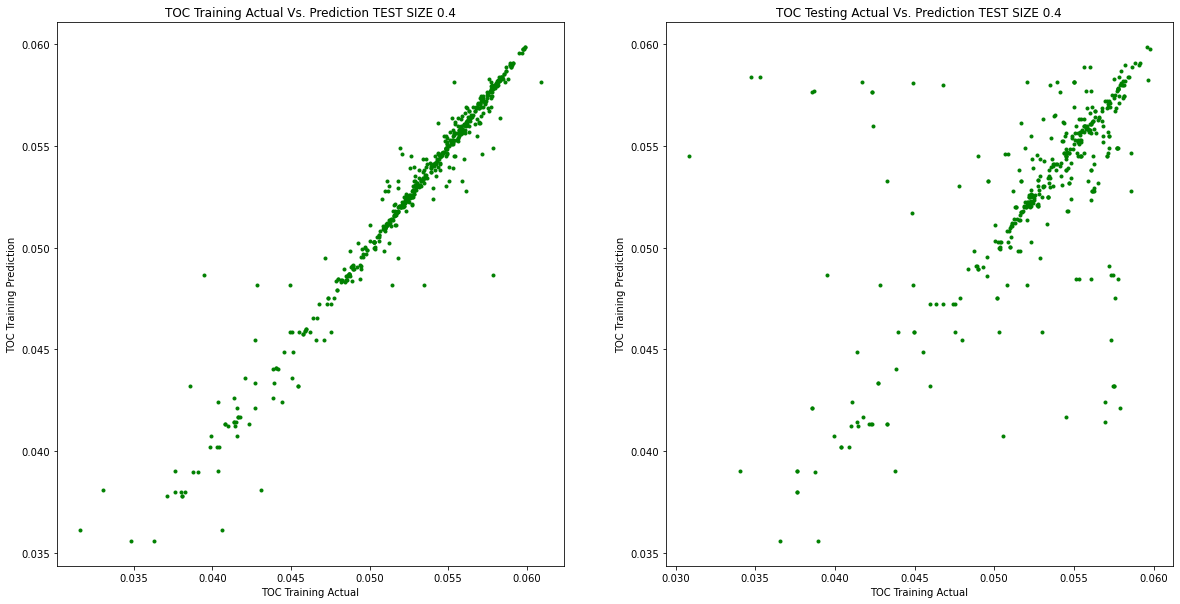

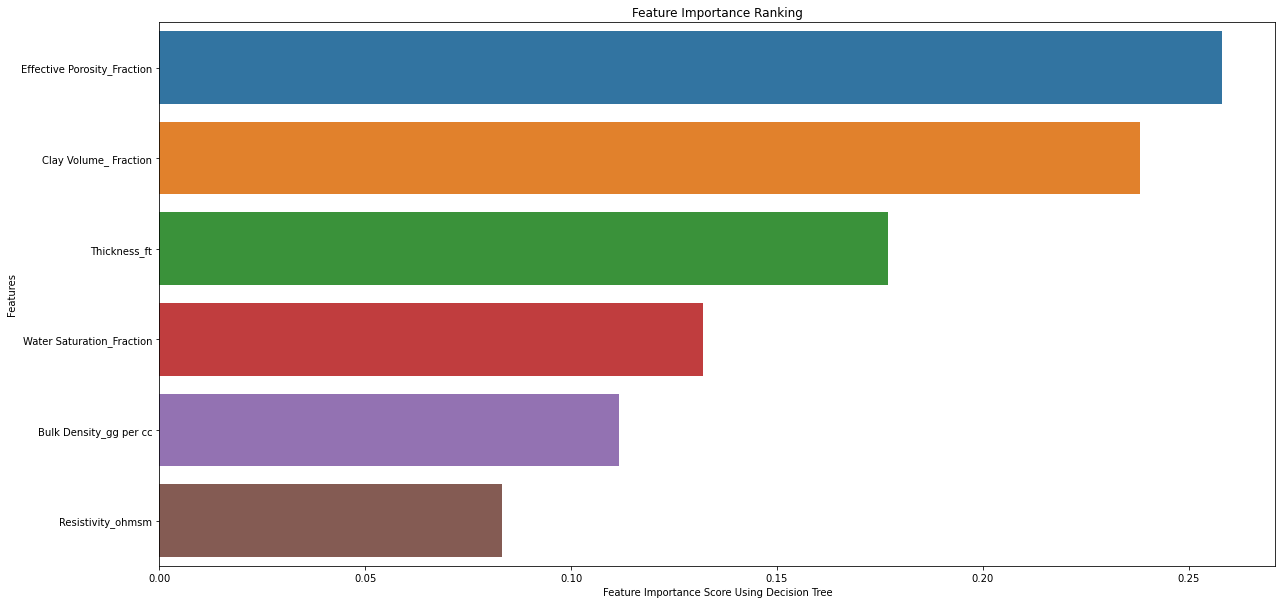

In [37]:
for size in test_sizes:
    np.random.seed(seed)
    dt = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=4, min_samples_leaf=2, max_features=None,ccp_alpha=0)
    x_train,x_test,y_train, y_test= train_test_split(x, y, test_size=size)
    dt.fit(x_train,y_train)
    y_tr_pred = dt.predict(x_train)
    y_te_pred = dt.predict(x_test)
    corr_train=np.corrcoef(y_train, y_tr_pred) [0,1]
    print('Training Data R^2=',round(corr_train**2,4),'R=', round(corr_train,4), 'for test size',str(size))
    corr_test=np.corrcoef(y_test, y_te_pred) [0,1]
    print('Testing Data R^2=',round(corr_test**2,4),'R=', round(corr_test,4), 'for test size', str(size))
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    ax[0].plot(y_train, y_tr_pred, 'g.')
    ax[0].set_xlabel('TOC Training Actual')
    ax[0].set_ylabel('TOC Training Prediction')
    ax[0].set_title('TOC Training Actual Vs. Prediction TEST SIZE ' + str(size))
    ax[1].plot(y_test, y_te_pred, 'g.')
    ax[1].set_xlabel('TOC Training Actual')
    ax[1].set_ylabel('TOC Training Prediction')
    ax[1].set_title('TOC Testing Actual Vs. Prediction TEST SIZE ' + str(size))
    feature_names = df.columns[:-1]
    fig1, ax1 = plt.subplots(figsize=(20,10))
    feature_imp = pd.Series(dt.feature_importances_,index=feature_names).sort_values(ascending=False)

    sns.barplot(x=feature_imp, y=feature_imp.index)
    ax1.set_xlabel('Feature Importance Score Using Decision Tree')
    ax1.set_ylabel('Features')
    ax1.set_title("Feature Importance Ranking")

In [39]:
from sklearn.ensemble import RandomForestRegressor

Training Data R^2= 0.9642 R= 0.9819 for test size 0.2
Testing Data R^2= 0.8882 R= 0.9424 for test size 0.2
Training Data R^2= 0.958 R= 0.9788 for test size 0.4
Testing Data R^2= 0.6738 R= 0.8209 for test size 0.4


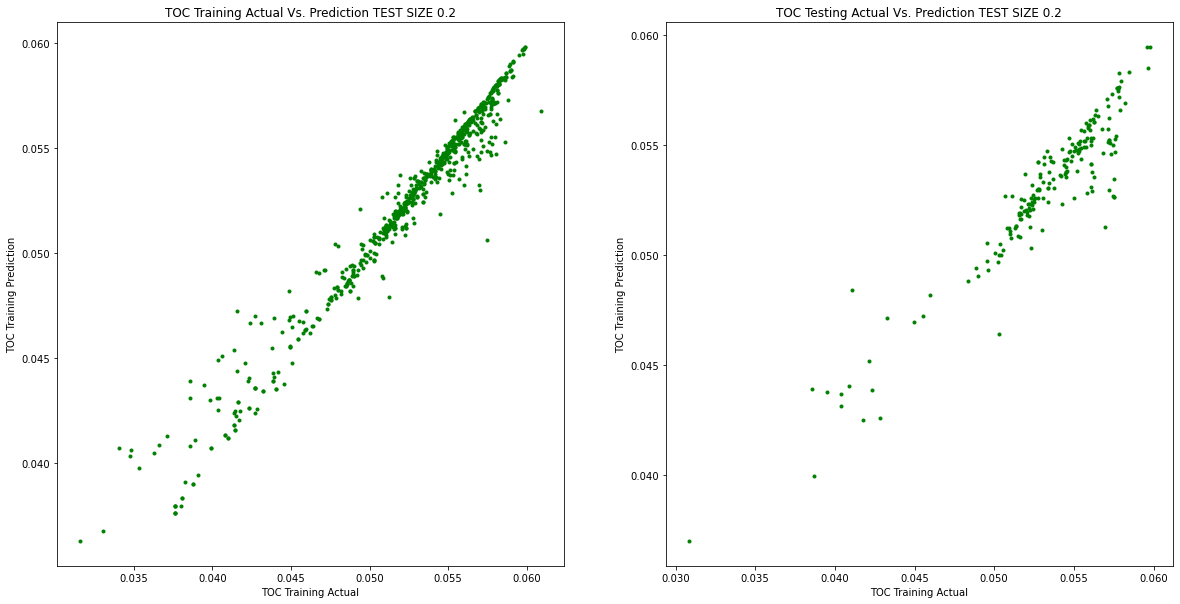

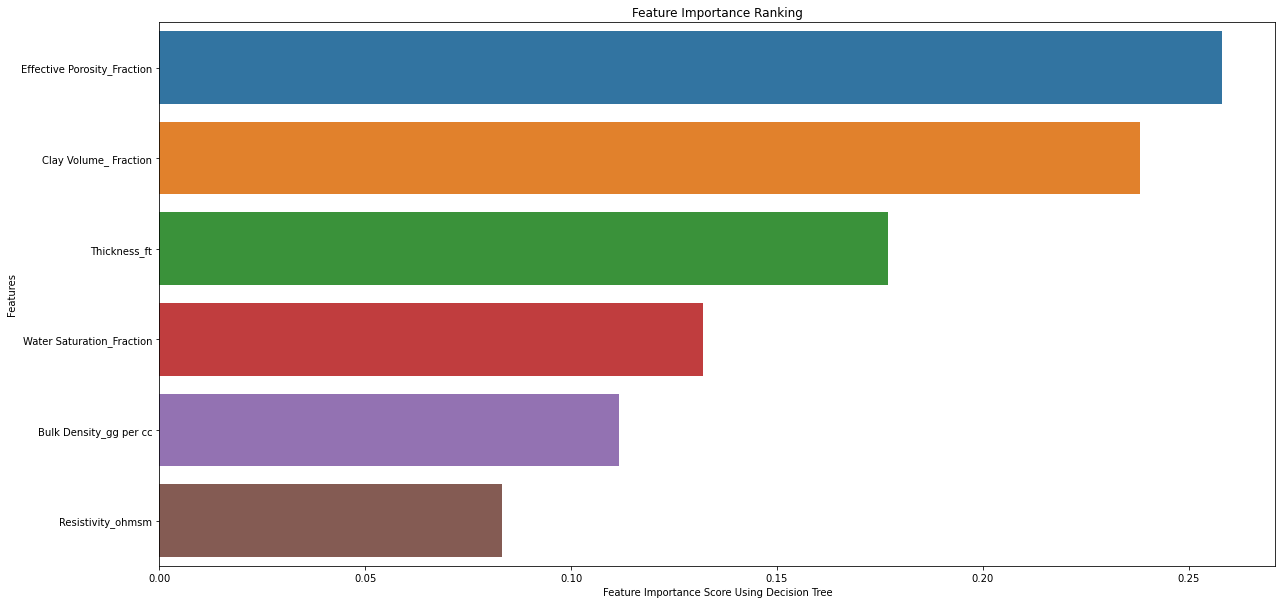

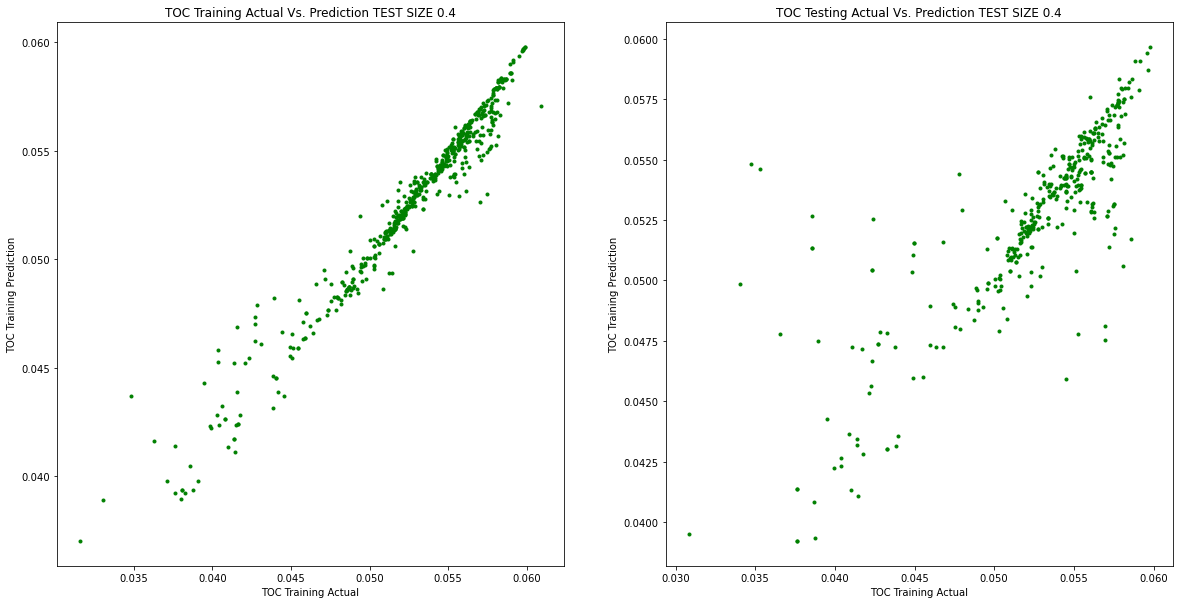

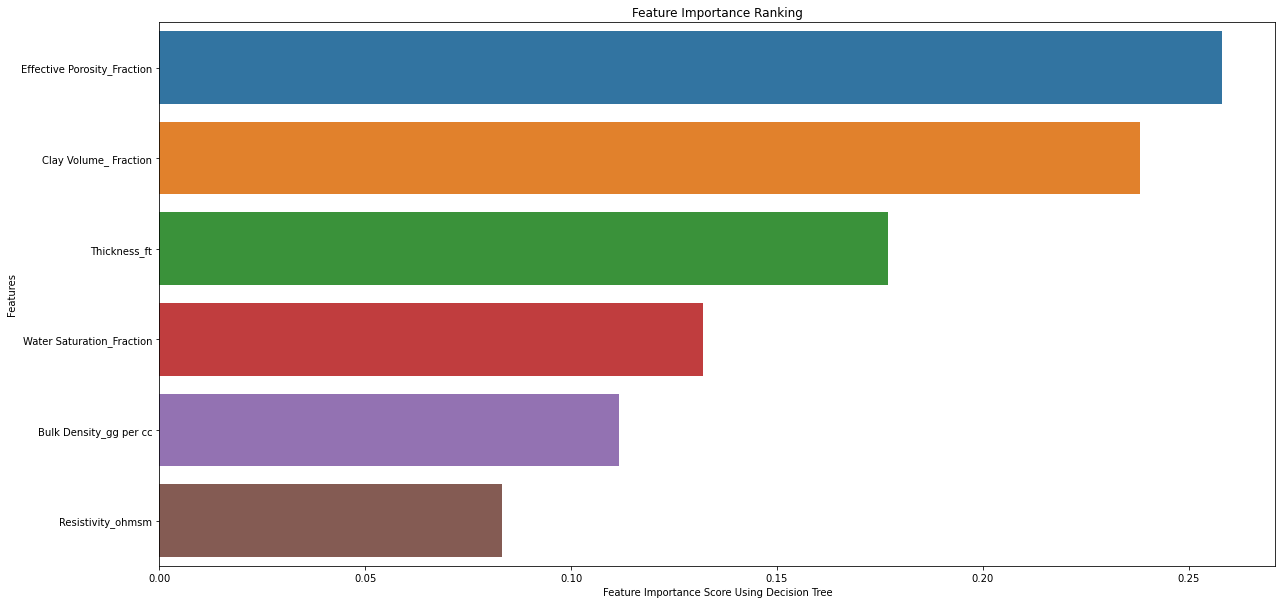

In [41]:
for size in test_sizes:
    np.random.seed(seed)
    rf = RandomForestRegressor(n_estimators=5000, criterion='mse',max_depth=None, min_samples_split=4, min_samples_leaf=2, max_features='auto', n_jobs=-1)
    x_train,x_test,y_train, y_test= train_test_split(x, y, test_size=size)
    rf.fit(x_train,y_train)
    y_tr_pred = rf.predict(x_train)
    y_te_pred = rf.predict(x_test)
    corr_train=np.corrcoef(y_train, y_tr_pred) [0,1]
    print('Training Data R^2=',round(corr_train**2,4),'R=', round(corr_train,4), 'for test size',str(size))
    corr_test=np.corrcoef(y_test, y_te_pred) [0,1]
    print('Testing Data R^2=',round(corr_test**2,4),'R=', round(corr_test,4), 'for test size', str(size))
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    ax[0].plot(y_train, y_tr_pred, 'g.')
    ax[0].set_xlabel('TOC Training Actual')
    ax[0].set_ylabel('TOC Training Prediction')
    ax[0].set_title('TOC Training Actual Vs. Prediction TEST SIZE ' + str(size))
    ax[1].plot(y_test, y_te_pred, 'g.')
    ax[1].set_xlabel('TOC Training Actual')
    ax[1].set_ylabel('TOC Training Prediction')
    ax[1].set_title('TOC Testing Actual Vs. Prediction TEST SIZE ' + str(size))
    feature_names = df.columns[:-1]
    fig1, ax1 = plt.subplots(figsize=(20,10))
    feature_imp = pd.Series(dt.feature_importances_,index=feature_names).sort_values(ascending=False)

    sns.barplot(x=feature_imp, y=feature_imp.index)
    ax1.set_xlabel('Feature Importance Score Using Decision Tree')
    ax1.set_ylabel('Features')
    ax1.set_title("Feature Importance Ranking")

In [42]:
import pypandoc

In [48]:
pypandoc.convert(source = 'Assignment 13.md',to = 'docx',outputfile = 'Assignment 13.docx')

<ipython-input-48-c4a31ded68ca>:1: DeprecationWarning: Due to possible ambiguity, 'convert()' is deprecated. Use 'convert_file()'  or 'convert_text()'.
  pypandoc.convert(source = 'Assignment 13.md',to = 'docx',outputfile = 'Assignment 13.docx')


''